# 超參數調整

 - 超參數會影響結果，但提升的效果有限，資料清理理與特徵工程才能最有效的提升準確率，調整參數只是一個加分的工具。
 
## 超參參數調整方方法
 - **窮舉法 (Grid Search)**：直接指定超參參數的組合範圍，每一組參數都訓練完成，再根據驗證集 (validation) 的結果選擇最佳參數
 - **隨機搜尋 (Random Search)**：指定超參數的範圍，用均勻分布進行參數抽樣，用抽到的參數進行訓練，再根據驗證集的結果選擇最佳參數
 - 隨機搜尋通常都能獲得更佳的結果，[詳見此](https://medium.com/rants-on-machine-learning/smarter-parameter-sweeps-or-why-grid-search-is-plain-stupid-c17d97a0e881)
 
--- 

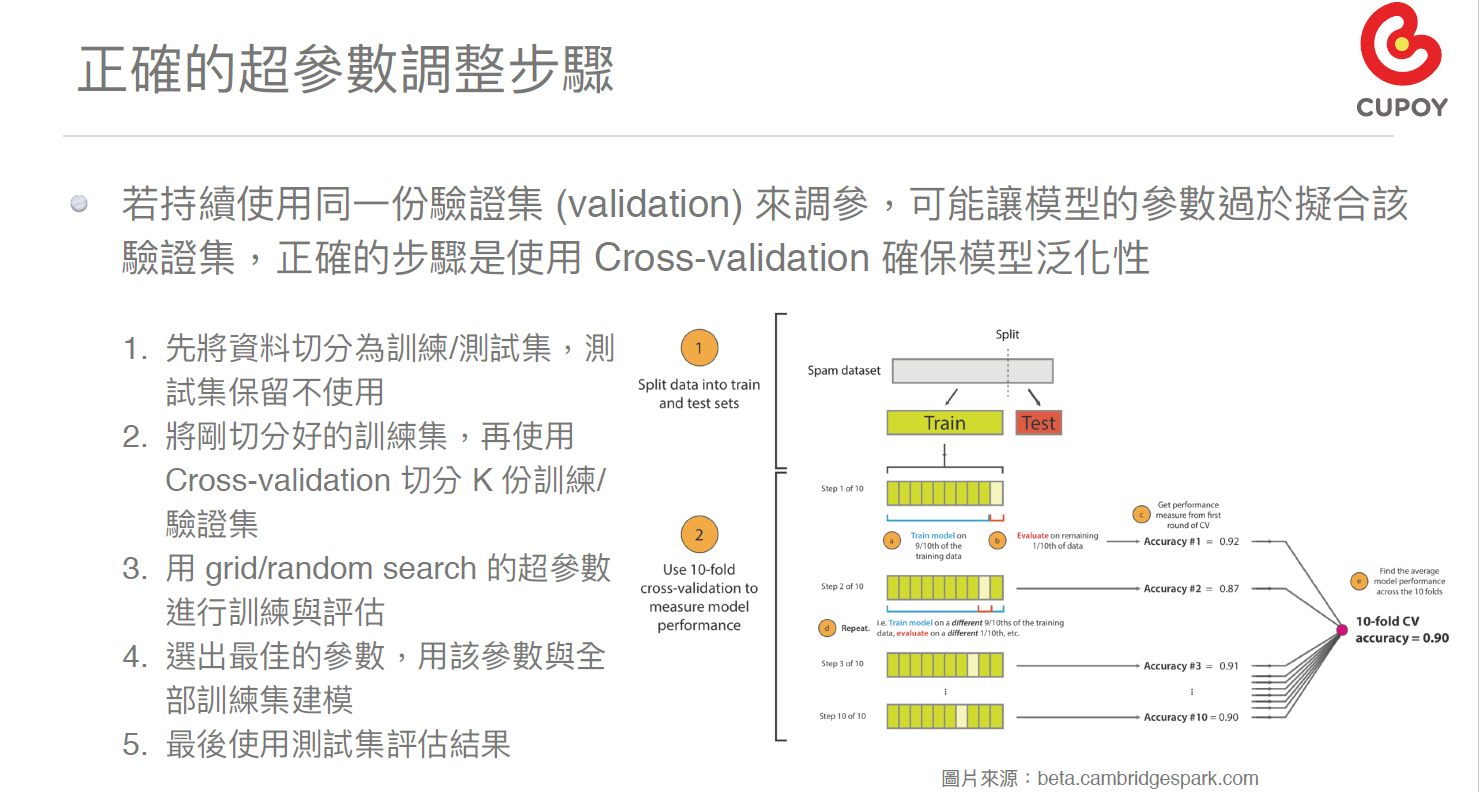

Q：超參參數調整對最終結果影響很⼤大嗎？
> A：超參數調整通常都是機器學習專案的最後步驟，
因為這對於最終的結果影響不會太多，多半是近一步
提升 3-5 % 的準確率，但是好的特徵工程與資料清理
是能夠一口氣提升 10-20 ％ 的準確率！因此建議專案
一開始時，不需要花太多時間進行超參數的調整

---

## Smarter Parameter Sweeps (or Why Grid Search Is Plain Stupid)

. The performance metric (or the objective function) can be visualized as a heat-map in the n-dimensional parameter-space or as a surface in an n+1-dimensional space (the dimension n+1 being the value of that objective function)
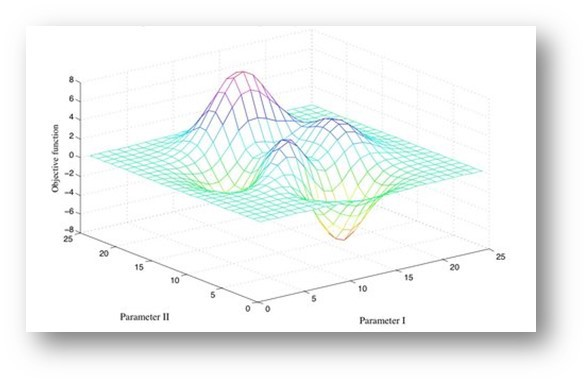
This amazing [paper](http://jmlr.csail.mit.edu/papers/volume13/bergstra12a/bergstra12a.pdf) by Bergstra et al. claims that a random search of the parameter space is guaranteed to be more effective than grid search (and quite competitive in comparison with more sophisticated techniques).

這個想法是，在大多數情況下，目標函數的表面並不是所有維度都十分具有顯著性。 一些參數對成本函數的影響要比其他參數小得多，如果每個參數的重要性已知，則可以正常使用網格搜索，但通常都不是如此。無論如何，只要嘗試相同的次數，僅使用隨機搜索就可以探索每個參數的更多值：
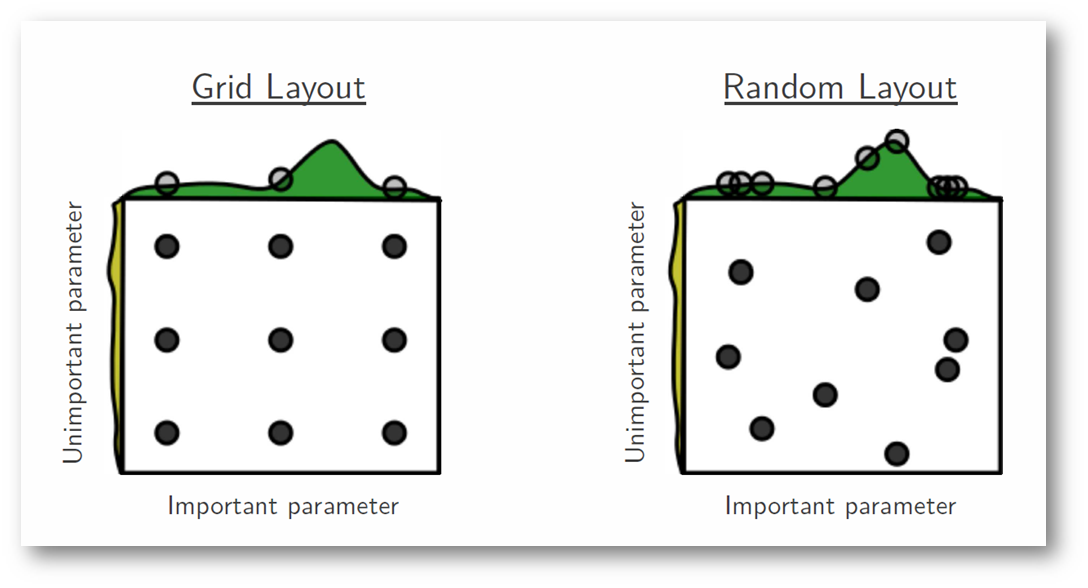

## [作業重點]
了解如何使用 Sklearn 中的 hyper-parameter search 找出最佳的超參數

### 作業
請使用不同的資料集，並使用 hyper-parameter search 的方式，看能不能找出最佳的超參數組合

In [1]:
from sklearn import datasets, metrics
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
from sklearn.model_selection import (
    train_test_split, KFold, GridSearchCV, RandomizedSearchCV, cross_val_score)

random_state = 9487

In [2]:
# 讀取 boston 資料集
boston = datasets.load_boston()

# 建立模型
clf = GradientBoostingRegressor(random_state=random_state)

## Use default without hyperparameters-search

In [3]:
scores = cross_val_score(
    clf, boston.data, boston.target, scoring='neg_mean_squared_error', cv=10, n_jobs=-1)

print(f"neg_mean_squared_error: {scores.mean()} +/- {scores.std()}")

neg_mean_squared_error: -19.010544096255938 +/- 20.571409072640076


## Grid-Search

In [4]:
# 設定要訓練的超參數組合
param_grid ={
    "n_estimators": [100, 200, 300, 400, 500], 
    "max_depth":    [1, 3, 5, 7, None],
    "learning_rate":[1e-3, 1e-2, 1e-1],
    "subsample":    [0.6, 0.8, 1.0],
}

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(
    clf, param_grid, scoring="neg_mean_squared_error", n_jobs=-1, verbose=1, cv=5, iid=True)

# 開始搜尋最佳參數
grid_result = grid_search.fit(boston.data, boston.target)

# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 261 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done 511 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 861 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  2.0min finished


Best Accuracy: -17.939567 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500, 'subsample': 0.6}


## Random-Search

使用了跟 grid-search 同樣的搜索次數 (225)

In [5]:
# 設定要訓練的超參數組合
param_distributions ={
    "n_estimators": range(100, 501, 50), 
    "max_depth":    range(1, 10),
    "learning_rate":np.linspace(0.001, 0.1, 100),
    "subsample":    np.linspace(0.6, 1, 20),
}

random_search = RandomizedSearchCV(
    clf, param_distributions, scoring="neg_mean_squared_error", 
    n_jobs=-1, verbose=1, cv=5, iid=True,
    n_iter=225 # 這邊使用 225 是為了對比剛剛使用的 grid-search (也總共用了 225 次進行搜索)
)

# 開始搜尋最佳參數
rs_result = random_search.fit(boston.data, boston.target)

# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (rs_result.best_score_, rs_result.best_params_))


Fitting 5 folds for each of 225 candidates, totalling 1125 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   15.2s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1125 out of 1125 | elapsed:  1.6min finished


Best Accuracy: -16.918388 using {'subsample': 0.7052631578947368, 'n_estimators': 500, 'max_depth': 2, 'learning_rate': 0.075}


### 從以上數據可以觀察到，同樣的搜索次數，**RandomizedSearchCV** 比起 GridSearchCV 獲得到更佳的結果